Rows: 118 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Case, Result
dbl (1): Runtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 118 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Case, Result
dbl (1): Runtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


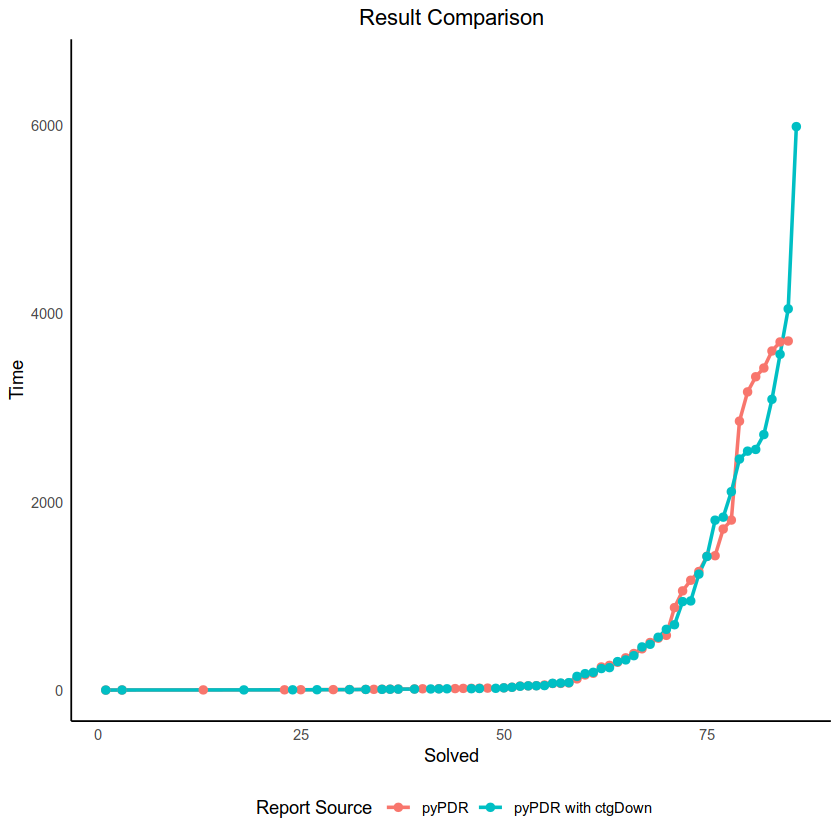

In [19]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr) # for read_csv, which is similar to read.csv but faster and with additional features

# Define the file paths
file_path1 <- './report_down.csv'
file_path2 <- './report_ctgdown.csv'

# Read the CSV files
data1 <- read_csv(file_path1)
data2 <- read_csv(file_path2)

# Add an identifier for each report
data1$Report <- 'pyPDR with ctgDown'
data2$Report <- 'pyPDR'

# Combine the two datasets
combined_data <- rbind(data1, data2)

# Filter out rows where Result is "Error" and "Timeout"
filtered_combined_data <- combined_data %>%
  filter(Result != "Error" & Result != "Timeout")

# Create a new data frame with unique time thresholds, cumulative counts, and distinguishing by Report
threshold_combined_data <- filtered_combined_data %>%
  arrange(Report, Runtime) %>%
  group_by(Report) %>%
  mutate(CumulativeCount = 1:n()) %>%
  distinct(Report, Runtime, .keep_all = TRUE) %>%
  ungroup() # To make sure the next operations are applied to the whole dataset

# Create a plot
plot <- ggplot(threshold_combined_data, aes(x = CumulativeCount, y = Runtime, color = Report)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Result Comparison",
       x = "Solved",
       y = "Time",
       color = "Report Source") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(colour = "black"),
    legend.position = "bottom"
  ) +
  scale_y_continuous(limits = c(0, max(threshold_combined_data$Runtime) * 1.1))

# Display the plot
print(plot)

                       Case Runtime_x    Result_x Runtime_y    Result_y
3         cmu.gigamax.B.aag         1   FOUND INV         2   FOUND INV
7         eijk.bs3330.S.aag      3092   FOUND INV      3425   FOUND INV
9         eijk.bs4863.S.aag      2559   FOUND INV      3712   FOUND INV
11         eijk.S1196.S.aag         2   FOUND INV         2   FOUND INV
12         eijk.S1238.S.aag         1   FOUND INV         1   FOUND INV
14          eijk.S208.S.aag        11   FOUND INV        12   FOUND INV
15         eijk.S208c.S.aag         8   FOUND INV         9   FOUND INV
16         eijk.S208o.S.aag         3   FOUND INV         3   FOUND INV
17          eijk.S298.S.aag        75   FOUND INV        71   FOUND INV
18          eijk.S344.S.aag       239   FOUND INV       389   FOUND INV
19          eijk.S349.S.aag       303   FOUND INV       343   FOUND INV
21          eijk.S386.S.aag        14   FOUND INV        15   FOUND INV
24          eijk.S510.S.aag       562   FOUND INV       582   FO

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 16 rows containing missing values (geom_point).”


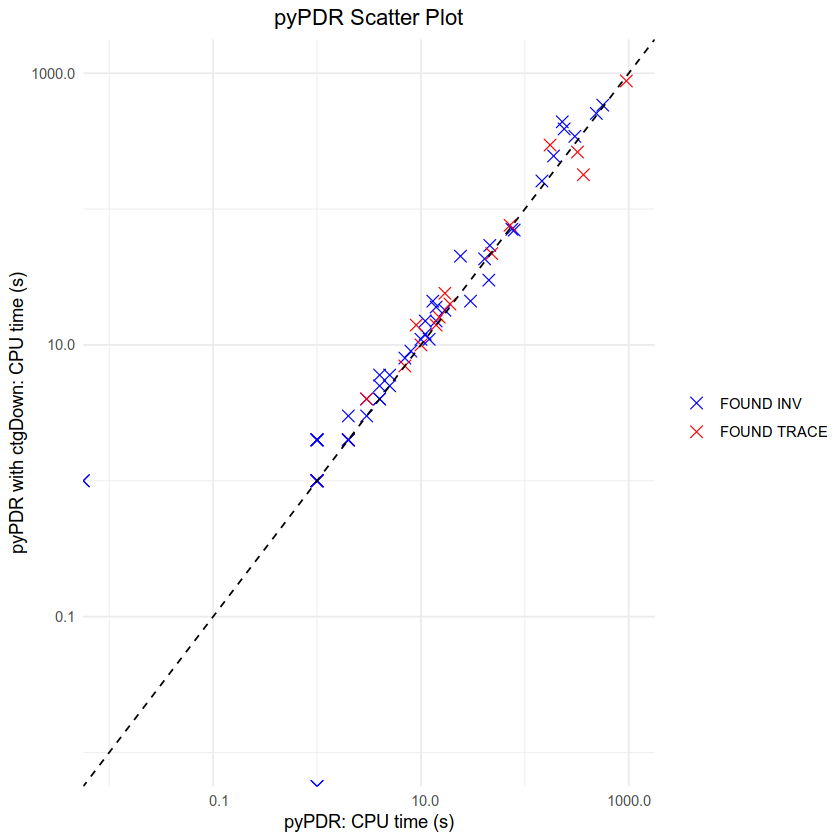

In [17]:
# Install and load required libraries
#install.packages("ggplot2")
library(ggplot2)

# Read in the CSV files
df1 <- read.csv("./report_down.csv")
df2 <- read.csv("./report_ctgdown.csv")

# Merge the data frames on the 'Case' column
merged_df <- merge(df1, df2, by = "Case", suffixes = c("_x", "_y"))

# Filter the merged data frame
filtered_df <- subset(merged_df, (Result_x == "FOUND INV" | Result_x == "FOUND TRACE") &
                                 (Result_y == "FOUND INV" | Result_y == "FOUND TRACE") &
                                 (Result_x == Result_y))

# print the filtered data frame
print(filtered_df)
# Create the scatter plot using ggplot2
scatter_plot <- ggplot(filtered_df, aes(x = Runtime_x, y = Runtime_y, color = Result_x)) +
  geom_point(shape = 4, size = 3) +  # Use 'x' marker
  scale_x_continuous(trans = "log10", limits = c(0.01, 1000),
                     labels = function(x) format(x, scientific = FALSE)) +
  scale_y_continuous(trans = "log10", limits = c(0.01, 1000),
                     labels = function(x) format(x, scientific = FALSE)) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed") +  # Add diagonal line
  labs(x = "pyPDR: CPU time (s)", y = "pyPDR with ctgDown: CPU time (s)",
       title = "pyPDR Scatter Plot") +
  scale_color_manual(values = c("FOUND INV" = "blue", "FOUND TRACE" = "red")) +  # Set color based on Result_x
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        legend.title = element_blank())  # Remove legend title

# Display the plot
print(scatter_plot)